Install Tensorflow 

In [1]:
!pip install tensorflow

In [4]:
import numpy as np

In [2]:
import tensorflow as tf

In [5]:
#version of tensorflow
tf.__version__

'2.6.0'

Here we are uploading the MNIST Data from inbuild set of datasets available in Keras module

In [3]:
from tensorflow.keras.datasets import fashion_mnist 

Data Preprocessing

In [6]:
(X_train,y_train), (X_test,y_test)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [9]:
import matplotlib.pyplot as plt

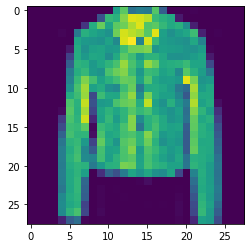

In [10]:
plt.imshow(X_test[10])

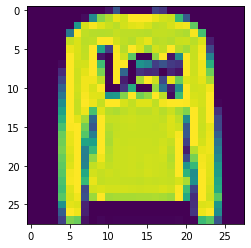

In [11]:
plt.imshow(X_test[1])

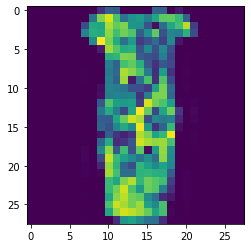

In [12]:
plt.imshow(X_test[100])

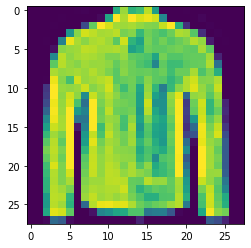

In [13]:
plt.imshow(X_test[50])

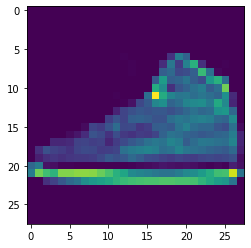

In [14]:
plt.imshow(X_test[45])

Image normalization:
We divide the train image and test image by maximum number of pixels(255) to get the pixel range in [0,1] which is suitable for ANN

In [7]:
X_train=X_train/255.0

In [8]:
X_test=X_test/255.0

Reshaping the dataset:
The training and testing data will be converted to vector format so that it fits well with ANN

.reshape(-1(all the images), height*width)

In [15]:
X_train=X_train.reshape(-1,28*28)#28*28 is the size of image

In [16]:
X_train.shape

(60000, 784)

In [17]:
X_test=X_test.reshape(-1,28*28)#28*28 is the size of image

In [18]:
X_test.shape

(10000, 784)

Building an Artificial Neural Network

defining the model

In [19]:
model=tf.keras.models.Sequential() #Sequential is the model architecture having input, hidden and output layer

Adding the first layer in NN

1. Number of neurons/units=128
2. Activation function=ReLU
3. Input shape=784

In [20]:
model.add(tf.keras.layers.Dense(units=128,activation='relu',input_shape=(784,)))

Adding the second layer in NN

1. Units=10
2. Activation function = Softmax

In [21]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

Compiling the model at the end:

We will compute the loss(error) and for Softmax activation function, Sparse Categorical Cross Entropy is a good measure for calculating Loss

In [26]:
model.compile(optimizer='Adagrad',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_crossentropy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Train the model

In [28]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0966 - sparse_categorical_crossentropy: 1.0966
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7380 - sparse_categorical_crossentropy: 0.7380
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6568 - sparse_categorical_crossentropy: 0.6568
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6127 - sparse_categorical_crossentropy: 0.6127
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5840 - sparse_categorical_crossentropy: 0.5840


Test the model

In [29]:
test_loss, test_accuracy=model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.5943 - sparse_categorical_crossentropy: 0.5943


In [30]:
print("test accuracy",test_accuracy)

test accuracy 0.5942533612251282
